In [35]:
#!pip install sklearn-som
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_som.som import SOM
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from yellowbrick.text import TSNEVisualizer
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

import matplotlib.patheffects as PathEffects

%matplotlib inline

## Kmeans Clusters

In [36]:
df = pd.read_csv("Pokemon.csv")
df.describe()
df = df.drop(['type1'] ,axis=1)

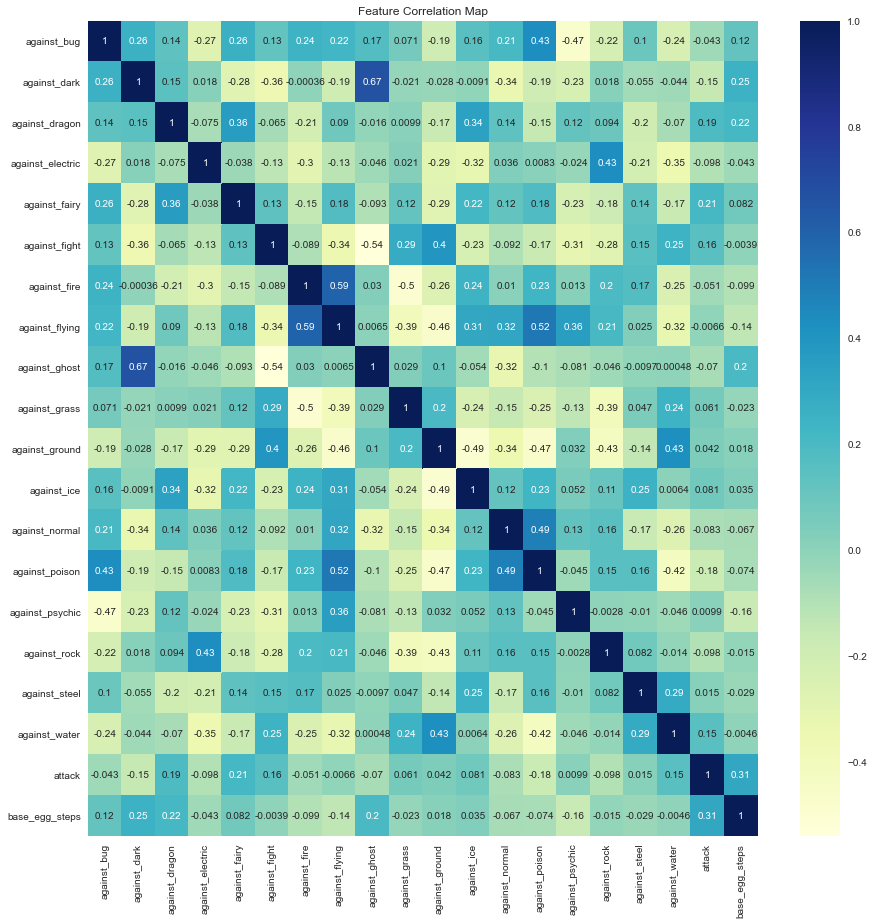

In [37]:
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

### Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of clusters.


In [38]:
n_max_clusters = 15
score = []
for cluster in range(1,n_max_clusters):
    kmeans_f = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans_f.fit(df)
    score.append(kmeans_f.inertia_)

###  Determine the optimal number of clusters for k-means. 


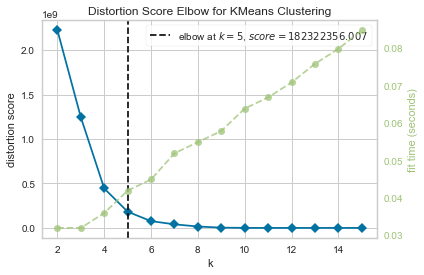

In [39]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=15)
model.fit(df)
model.show()

## Self Organizing Map

In [40]:
poke = pd.read_csv("Pokemon.csv")
poke["type1"] = poke["type1"].astype('category')
poke["type1"] = poke["type1"].cat.codes
y= poke['type1']
X=poke.drop(columns=['type1']).values



In [41]:
X_trans = StandardScaler().fit_transform(X)


### Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of neurons (max 30 neurons). 


In [42]:
score_SOM = []
for neuron in range(1,31): 
    Som = SOM(m=neuron, n=1, dim=20)
    Som.fit(X)
    score_SOM.append(Som.inertia_)


### Determine the optimal number of neurons for SOM. 

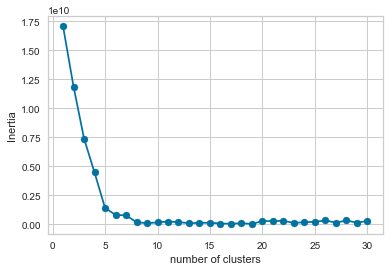

In [43]:

plt.plot(range(1,31), score_SOM)
plt.scatter(range(1,31), score_SOM)

plt.xlabel('number of clusters')
plt.ylabel('Inertia')

# n = 4
# plt.annotate(f"Number of clusters = {n}", xy=(n, score2[n]), xytext=(n-3, score2[n]*0.8), arrowprops=dict(arrowstyle="->"))


plt.show()


In [44]:
Som = SOM(m=7, n=1, dim=20)
Som.fit(X)
predictions = Som.predict(X)

### Use T-SNE method to visualize the SOM clusters, obtained from the previous step, on a 2D figure. Use different color code for each cluster

### Tsne vs SOM Predictions 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

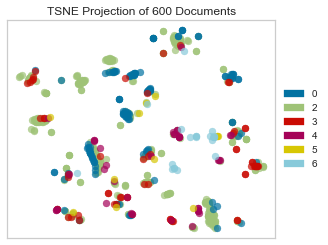

In [53]:
tsne = TSNEVisualizer(decompose= None, random_state=123)
tsne.fit(X_trans, predictions)
tsne.show()

### Tsne VS actual labels

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

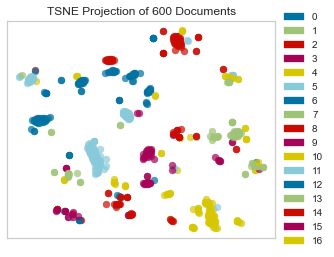

In [54]:
tsne = TSNEVisualizer(decompose= None, random_state=123)
tsne.fit(X_trans, y)
tsne.show()

In [55]:
def countDistinct(arr, n):
 
    res = 1
 
    # Pick all elements one by one
    for i in range(1, n):
        j = 0
        for j in range(i):
            if (arr[i] == arr[j]):
                break
 
        # If not printed earlier, then print it
        if (i == j + 1):
            res += 1
     
    return res

In [56]:

y

0       8
1       8
2       8
3       6
4       6
       ..
595     0
596     8
597     8
598    15
599    15
Name: type1, Length: 600, dtype: int8

In [57]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [58]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(X)


In [59]:
# from sklearn.cluster import DBSCAN
# eps = []
# min_samp = []
# Num_Clust = []
# for i in range (1, 10):
#     clustering = DBSCAN(eps=i/10, min_samples=i).fit(df)
#     y_pred = clustering.fit_predict(df)
#     core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
#     core_samples_mask[clustering.core_sample_indices_] = True
#     labels = clustering.labels_
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#     n_noise_ = list(labels).count(-1)
#     eps.append(i/10)
#     min_samp.append(i)
#     Num_Clust.append(n_clusters_)
#     if n_clusters_ == 10:
#         break;
#     print(n_clusters_)

### Plot the epsilon and minpoints values as x-y axes using a 3D figure to show the 10 combinations of epsilon and minpoints that brings you closer to the 10 clusters. The z-axis should illustrate the number of clusters you obtain when using the corresponding epsilon and minpoints.

###  After determine the parameters for DBSCAN with 10 clusters, plot DBSCAN clusters.


In [60]:
x_genrated = []
y_genrated = []
z_genrated = []
epsilon =  np.arange(60, 70)
import random
min_points = np.arange(40,50)
import decimal



In [61]:
def combinations(epsilon, min_points, x, y, z, X):
    
    db = DBSCAN(eps=epsilon, min_samples=min_points).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    x.append(epsilon)
    y.append(min_points)
    z.append(n_clusters_)
    print('Estimated number of clusters: %d' % n_clusters_)
    return db, n_clusters_, x, y, z


In [62]:
for i in range(epsilon.max(), 0, -1):
    for j in range(10,20):
        db, n_clusters_, x, y, z = combinations(i* decimal.Decimal(random.randrange(50, 100))/100, j, x_genrated, y_genrated, z_genrated, X)
        if n_clusters_==10:
            print('epsilon %d' %i)
            print('minpoints %d' % j)
        break
    if n_clusters_==10:
        break

Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimated number of clusters: 8
Estimate

In [63]:
parameters = pd.DataFrame()
parameters['Epsilon'] = x_genrated
parameters['Minpoints'] = y_genrated
parameters['Number of clusters'] = z_genrated
parameters.head(20)

,Epsilon,Minpoints,Number of clusters
0,58.65,10,9
1,44.88,10,9
2,54.94,10,9
3,63.36,10,9
4,61.75,10,9
5,62.72,10,9
6,59.22,10,9
7,54.56,10,9
8,50.02,10,9
9,42.6,10,9


In [64]:
result1 =  parameters[parameters["Number of clusters"] == 9]


In [65]:
result2 =  parameters[parameters["Number of clusters"] == 8]
result3 =  parameters[parameters["Number of clusters"] == 10]

In [66]:
parameters_final = pd.concat([result1.head(5),result2.tail(5), result3], axis= 0)
epsilon =  parameters_final["Epsilon"].tolist()
epsilon = np.array(epsilon).astype(float)


In [67]:
parameters_final


,Epsilon,Minpoints,Number of clusters
0,58.65,10,9
1,44.88,10,9
2,54.94,10,9
3,63.36,10,9
4,61.75,10,9
35,31.96,10,8
36,28.38,10,8
37,31.36,10,8
41,26.6,10,8
42,20.79,10,8


Text(0.5, 0, 'minpoints')

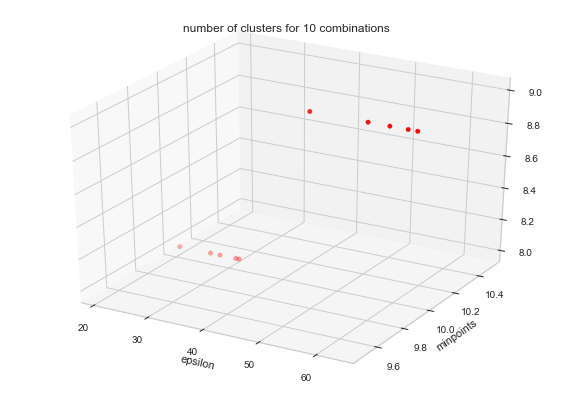

In [68]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(parameters_final.Epsilon ,parameters_final.Minpoints, parameters_final["Number of clusters"], color = "red")
plt.title("number of clusters for 10 combinations")
plt.xlabel('epsilon')
plt.ylabel('minpoints')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

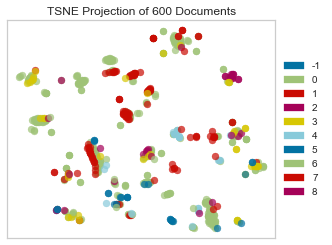

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

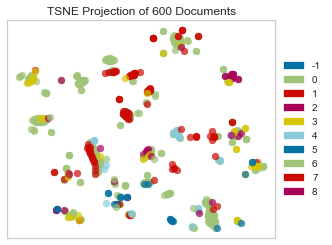

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

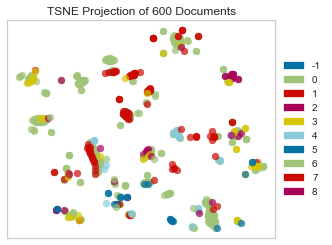

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

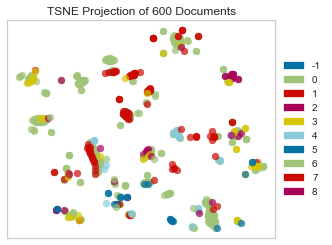

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

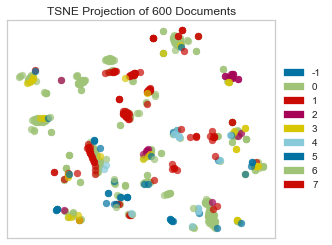

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

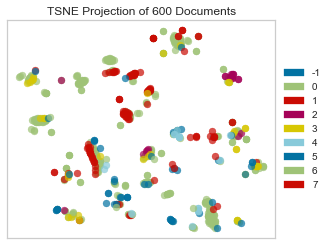

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

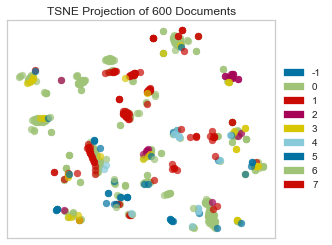

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

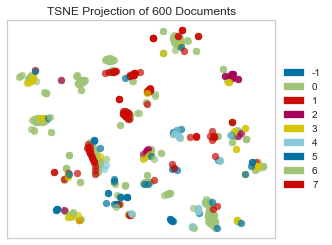

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

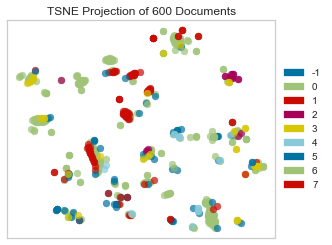

In [69]:
n_clusters=[]
for i in range(1,10):
    db = DBSCAN(eps=epsilon[i], min_samples=10).fit(X)
    db_predictions = db.labels_
    tsne = TSNEVisualizer(decompose= None, random_state=123)
    tsne.fit(X_trans, db_predictions)
    tsne.show()